This notebook is the data analyis part of my CodeYou capstone project.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

read data

In [13]:
#USA male fertility (fert) and overall health (oh) relevant data selected from the NSFG_2022_2023 male respondents dataset
df_fert_oh = pd.read_csv('../data/NSFG_2022_2023_male_fertility_data.csv', usecols=['CaseID',
    'RSCRHISP', 'RSCRRACE', 'HISP', 'HISPGRP',
    'YOUGOFPC', 'WHENGOFP', 'YOUFPSVC_1', 'YOUFPSVC_2', 'YOUFPSVC_3', 'YOUFPSVC_4', 'YOUFPSVC_5', 'YOUFPSVC_6', 'YOUFPSVC_7',
    'VISION', 'HEARING', 'MOBILITY', 'COGNITION', 'SELFCARE','COMMUNIC', 'EVRCANCER', 'AGECANCER', 'ALCORISK',
    'BLDPRESS', 'HIGHBP', 'BPMEDS', 'BPMON', 'BPMONFRQ',
    'INFHELP', 'INFSVCS_1', 'INFSVCS_2', 'INFSVCS_3', 'INFSVCS_4', 'INFSVCS_5', 'INFSVCS_6',
    'INFHLPNW', 'LASTHELP', 'INFRTHIS_1', 'INFRTHIS_2', 'INFRTHIS_3',
    'GENHEALT', 'BMIcat', 'DRWEIGH', 'TELLWGHT',  
    'SMK100', 'AGESMK', 'SMOKE30', 'DRINK12', 'BINGE12', 'POT12',
    'AGER', 'HISPANIC','HISPRACE2','METRO'])

#male fertility related molecular data merged from visem data sets
df_mol_sig = pd.read_csv('../data/male_fertility_mol_sig.csv')

change categorical data to dtype 'category' and check 

In [14]:
df_fert_oh[['RSCRHISP', 'RSCRRACE', 'HISP', 'HISPGRP',
    'YOUGOFPC', 'WHENGOFP', 'YOUFPSVC_1', 'YOUFPSVC_2', 'YOUFPSVC_3',
    'YOUFPSVC_4', 'YOUFPSVC_5', 'YOUFPSVC_6', 'YOUFPSVC_7',
    'VISION', 'HEARING', 'MOBILITY', 'COGNITION', 'SELFCARE','COMMUNIC',
    'EVRCANCER', 'AGECANCER', 'ALCORISK',
    'BLDPRESS', 'HIGHBP', 'BPMEDS', 'BPMON', 'BPMONFRQ',
    'INFHELP', 'INFSVCS_1', 'INFSVCS_2', 'INFSVCS_3', 'INFSVCS_4', 'INFSVCS_5', 'INFSVCS_6',
    'INFHLPNW', 'LASTHELP', 'INFRTHIS_1', 'INFRTHIS_2', 'INFRTHIS_3',
    'GENHEALT', 'BMIcat', 'DRWEIGH', 'TELLWGHT',  
    'SMK100', 'SMOKE30', 'DRINK12', 'BINGE12', 'POT12',
    'HISPANIC','HISPRACE2','METRO']] = df_fert_oh[['RSCRHISP', 'RSCRRACE', 'HISP', 'HISPGRP',
    'YOUGOFPC', 'WHENGOFP', 'YOUFPSVC_1', 'YOUFPSVC_2', 'YOUFPSVC_3',
    'YOUFPSVC_4', 'YOUFPSVC_5', 'YOUFPSVC_6', 'YOUFPSVC_7',
    'VISION', 'HEARING', 'MOBILITY', 'COGNITION', 'SELFCARE','COMMUNIC',
    'EVRCANCER', 'AGECANCER', 'ALCORISK',
    'BLDPRESS', 'HIGHBP', 'BPMEDS', 'BPMON', 'BPMONFRQ',
    'INFHELP', 'INFSVCS_1', 'INFSVCS_2', 'INFSVCS_3', 'INFSVCS_4', 'INFSVCS_5', 'INFSVCS_6',
    'INFHLPNW', 'LASTHELP', 'INFRTHIS_1', 'INFRTHIS_2', 'INFRTHIS_3',
    'GENHEALT', 'BMIcat', 'DRWEIGH', 'TELLWGHT',  
    'SMK100', 'SMOKE30', 'DRINK12', 'BINGE12', 'POT12',
    'HISPANIC','HISPRACE2','METRO']].astype('category')

In [15]:
print(df_fert_oh.shape)
df_fert_oh.dtypes

(4371, 54)


CaseID           int64
RSCRHISP      category
RSCRRACE      category
HISP          category
HISPGRP       category
YOUGOFPC      category
WHENGOFP      category
YOUFPSVC_1    category
YOUFPSVC_2    category
YOUFPSVC_3    category
YOUFPSVC_4    category
YOUFPSVC_5    category
YOUFPSVC_6    category
YOUFPSVC_7    category
VISION        category
HEARING       category
MOBILITY      category
COGNITION     category
SELFCARE      category
COMMUNIC      category
EVRCANCER     category
AGECANCER     category
ALCORISK      category
BLDPRESS      category
HIGHBP        category
BPMEDS        category
BPMON         category
BPMONFRQ      category
INFHELP       category
INFSVCS_1     category
INFSVCS_2     category
INFSVCS_3     category
INFSVCS_4     category
INFSVCS_5     category
INFSVCS_6     category
INFHLPNW      category
LASTHELP      category
INFRTHIS_1    category
INFRTHIS_2    category
INFRTHIS_3    category
GENHEALT      category
BMIcat        category
DRWEIGH       category
TELLWGHT   

Text(0.5, 9.444444444444438, 'Respondent Age')

<Figure size 300x300 with 0 Axes>

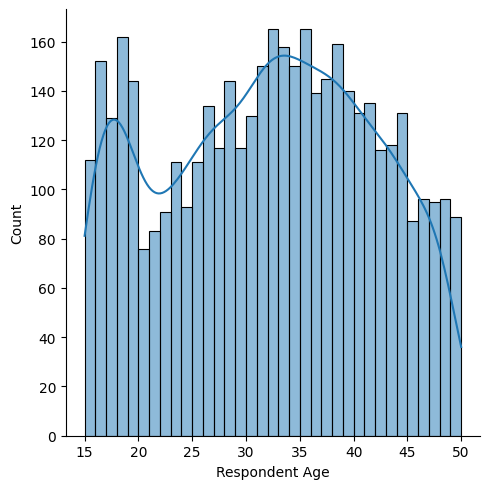

In [16]:
# Check the distribution of respondent ages
plt.figure(figsize=(3, 3))
sns.displot(df_fert_oh['AGER'], kde=True, bins=35)
plt.xlabel('Respondent Age')
#sns.countplot(df_fert_oh['INFHELP'])



C:\Users\david\AppData\Local\Temp\ipykernel_32612\4199932535.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Yes', 'No', 'Not ascertained', 'Refused', 'Uknown', 'Not applicable'], rotation=45, ha='right')


Text(0.5, 0, '')

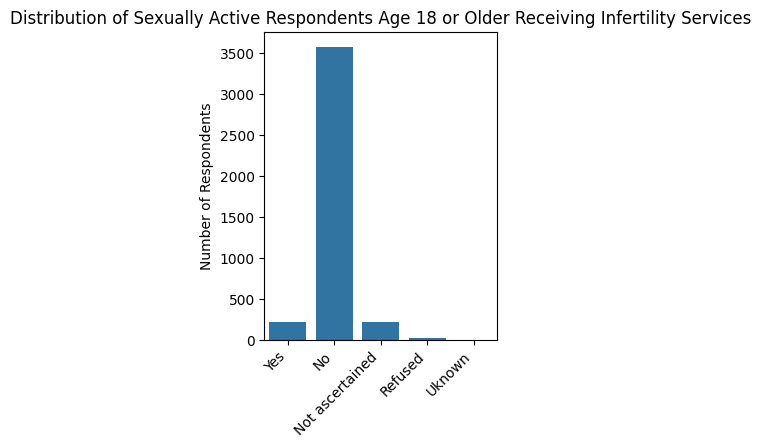

In [17]:
plt.figure(figsize=(3, 4))
ax = sns.countplot(data=df_fert_oh, x='INFHELP')
ax.set_xticklabels(['Yes', 'No', 'Not ascertained', 'Refused', 'Uknown', 'Not applicable'], rotation=45, ha='right')
plt.title('Distribution of Sexually Active Respondents Age 18 or Older Receiving Infertility Services')
plt.ylabel('Number of Respondents')
plt.xlabel(None)


make a df named df_infhelp by filtering df_fert_oh for respondents that indicated 'yes'='1' OR 'no'=5 to INFHELP. This will be a proxy for infertility status. INFHELP

In [18]:
df_infhelp = df_fert_oh[df_fert_oh['INFHELP'].isin([1.0, 5.0])].copy().reset_index(drop=True)
df_infhelp['infertile'] = ['yes' if x == 1.0 else 'no' for x in df_infhelp['INFHELP']]
print(df_infhelp.shape)
print(df_infhelp['INFHELP'].dtypes)
df_infhelp.groupby('infertile').count()


(3806, 55)
category


,CaseID,RSCRHISP,RSCRRACE,HISP,HISPGRP,YOUGOFPC,WHENGOFP,YOUFPSVC_1,YOUFPSVC_2,YOUFPSVC_3,...,SMK100,AGESMK,SMOKE30,DRINK12,BINGE12,POT12,AGER,HISPANIC,HISPRACE2,METRO
infertile,,,,,,,,,,,,,,,,,,,,,
no,3578,3577,3578,3578,701,3578,238,44,19,12,...,3573,1134,1134,3572,2725,3572,3578,3578,3578,3578
yes,228,228,228,228,38,228,29,7,2,0,...,226,75,75,226,187,226,228,228,228,228


group df_infhelp by infertility status, 'infertile', and return stats for health variables

In [19]:
df_infhelp.groupby('infertile', observed=True).agg({'INFHELP': ['count', 'nunique'],
                                                    'GENHEALT': ['count', 'nunique'],
                                                    'BMIcat': ['count', 'nunique'],
                                                    'EVRCANCER': ['count', 'nunique'],
                                                    'AGECANCER': ['count', 'nunique'],
                                                    'HIGHBP': ['count', 'nunique'],
                                                    'MOBILITY': ['count', 'nunique'],
                                                    'SELFCARE': ['count', 'nunique'],
                                                    'VISION': ['count', 'nunique'],
                                                    'HEARING': ['count', 'nunique']}).reset_index()


infertile INFHELP         GENHEALT         BMIcat         EVRCANCER          \
              count nunique    count nunique  count nunique     count nunique   
0        no    3578       1     3577       7   3259       5      3578       4   
1       yes     228       1      226       5    225       5       228       2   

  AGECANCER  ... HIGHBP         MOBILITY         SELFCARE         VISION  \
      count  ...  count nunique    count nunique    count nunique  count   
0        57  ...   2382       5     3578       5     3578       6   3578   
1        11  ...    180       4      228       5      228       4    228   

          HEARING          
  nunique   count nunique  
0       6    3578       6  
1       4     228       4  

[2 rows x 21 columns]

graph overall health by infertility

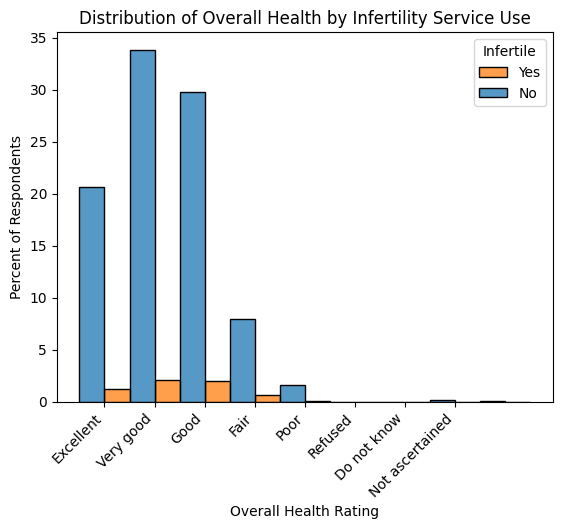

In [20]:
ax = sns.histplot(data=df_infhelp, x='GENHEALT', hue='infertile', stat='percent', multiple='dodge', discrete=True)
ax.set_xticks(ticks=np.arange(1, 9))
ax.set_xticklabels(['Excellent', 'Very good', 'Good', 'Fair', 'Poor', 'Refused', 'Do not know',
                   'Not ascertained'], rotation=45, ha='right')
plt.title('Distribution of Overall Health by Infertility Service Use')
plt.ylabel('Percent of Respondents')
plt.xlabel('Overall Health Rating')
plt.legend(title='Infertile', loc='upper right', labels=['Yes', 'No'])

Make body mass index (BMI) data human readable by defined BMI class description based on BMI-cat

In [21]:
def BMI_class (x):
    if x == 1.0:
        return 'Underweight'
    elif x == 2.0:
        return 'Normal weight'
    elif x == 3.0:
        return 'Overweight'
    elif x == 4.0:
        return 'Obese'
    elif x == 5.0:
        return 'BMI undefinable'
    else:
        return 'BMI undefinable'
df_infhelp['BMI_class'] = df_infhelp['BMIcat'].apply(BMI_class).reset_index(drop=True)
df_infhelp.shape

(3806, 56)

categorical plot of infertile status and general health by body mass index class (BMI_class)

<Figure size 400x400 with 0 Axes>

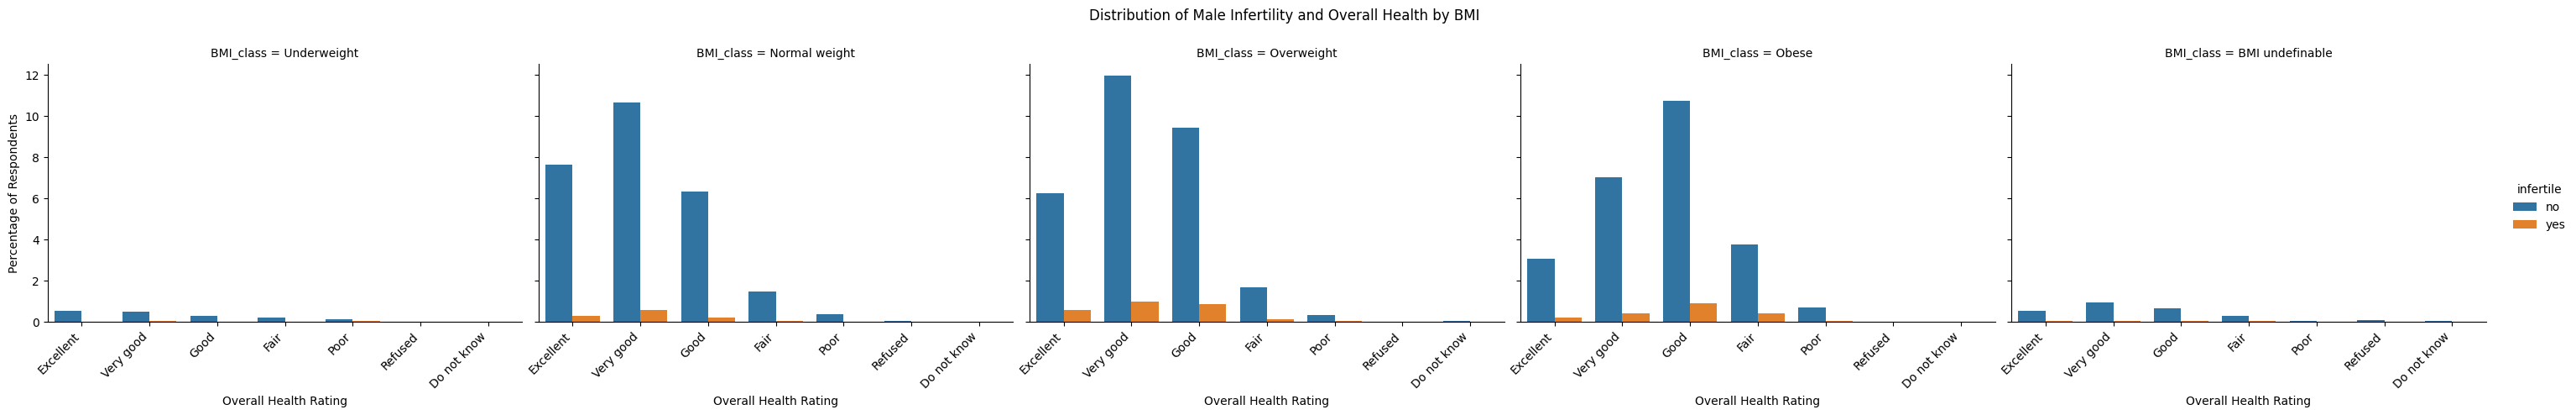

In [32]:

plt.figure(figsize=(4, 4))
ax = sns.catplot(data=df_infhelp, x='GENHEALT', kind='count', stat='percent', hue='infertile', col='BMI_class',
                height=4, aspect=1.5)

x_labels = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor', 'Refused', 'Do not know']
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.figure.suptitle('Distribution of Male Infertility and Overall Health by BMI', y=1.08)
ax.set_xlabels('Overall Health Rating')
ax.set_ylabels('Percentage of Respondents')

Make cancer data human readable by defining ever had cancer classes as yes, no, or unknown based on EVRCANCER

In [23]:
def cancer (x):
    if x == 1.0:
        return 'Positive'
    elif x == 5.0:
        return 'Negative'
    elif x == 8.0:
        return 'Unknown'
    elif x == 9.0:
        return 'Unknown'
    else:
        return 'Unknown'
df_infhelp['cancer_history'] = df_infhelp['EVRCANCER'].apply(cancer).reset_index(drop=True)
df_infhelp.shape

(3806, 57)

categorical plot of general health by infertility status and cancer class

<Figure size 300x400 with 0 Axes>

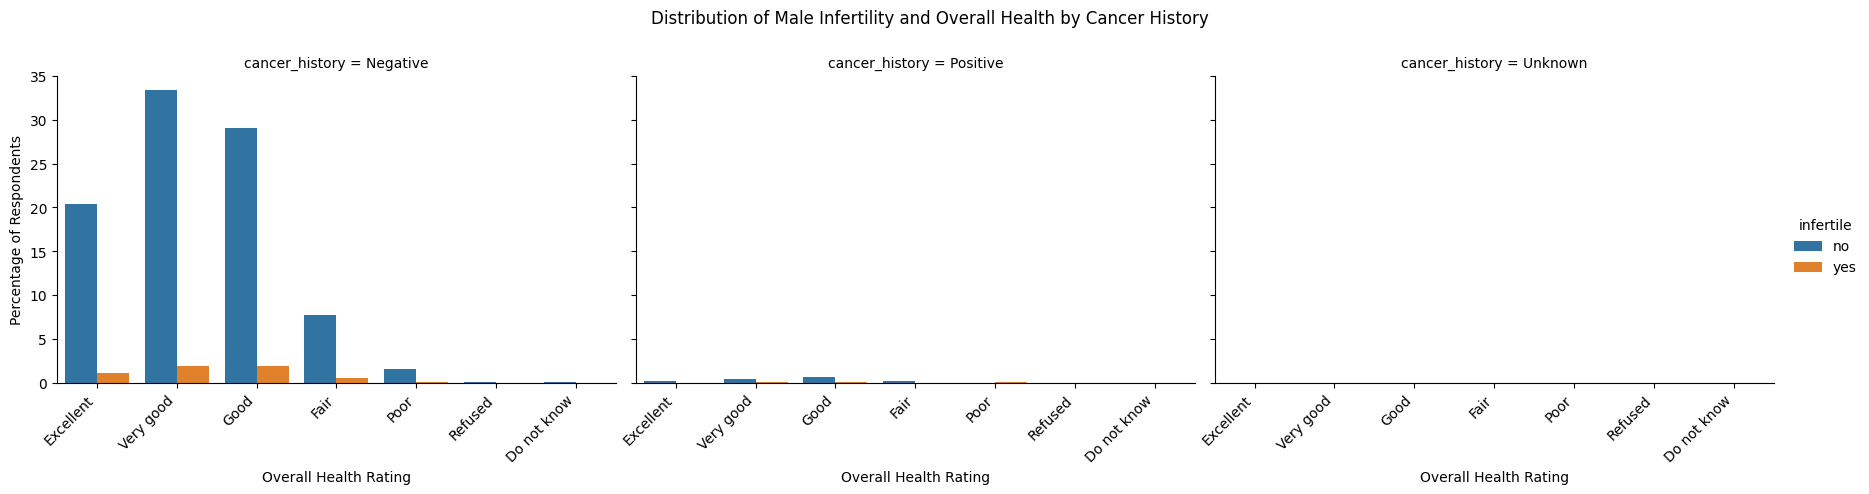

In [33]:
plt.figure(figsize=(3, 4))
ax = sns.catplot(data=df_infhelp, x='GENHEALT', kind='count', stat='percent', hue='infertile', col='cancer_history',
                height=4, aspect=1.5)

x_labels = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor', 'Refused', 'Do not know']
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.figure.suptitle('Distribution of Male Infertility and Overall Health by Cancer History', y=1.08)
ax.set_xlabels('Overall Health Rating')
ax.set_ylabels('Percentage of Respondents')

The cancer history 'yes' results are difficult to see....return to make a plot using those data alone

Make blood pressure data human readable by defining blood pressure classes (BP_class) as yes, no, or unknown based on HIGHBP

In [25]:
def BP_class (x):
    if x == 1.0:
        return 'High BP'
    elif x == 5.0:
        return 'Normal BP'
    elif x == 6.0:
        return 'Unknown'
    elif x == 8.0:
        return 'Unknown'
    elif x == 9.0:
        return 'Unknown'
    else:
        return 'Unknown'
df_infhelp['BP_class'] = df_infhelp['HIGHBP'].apply(BP_class).reset_index(drop=True)
df_infhelp.shape

(3806, 58)

categorical plot of overall health and infertility by blood pressure

<Figure size 300x400 with 0 Axes>

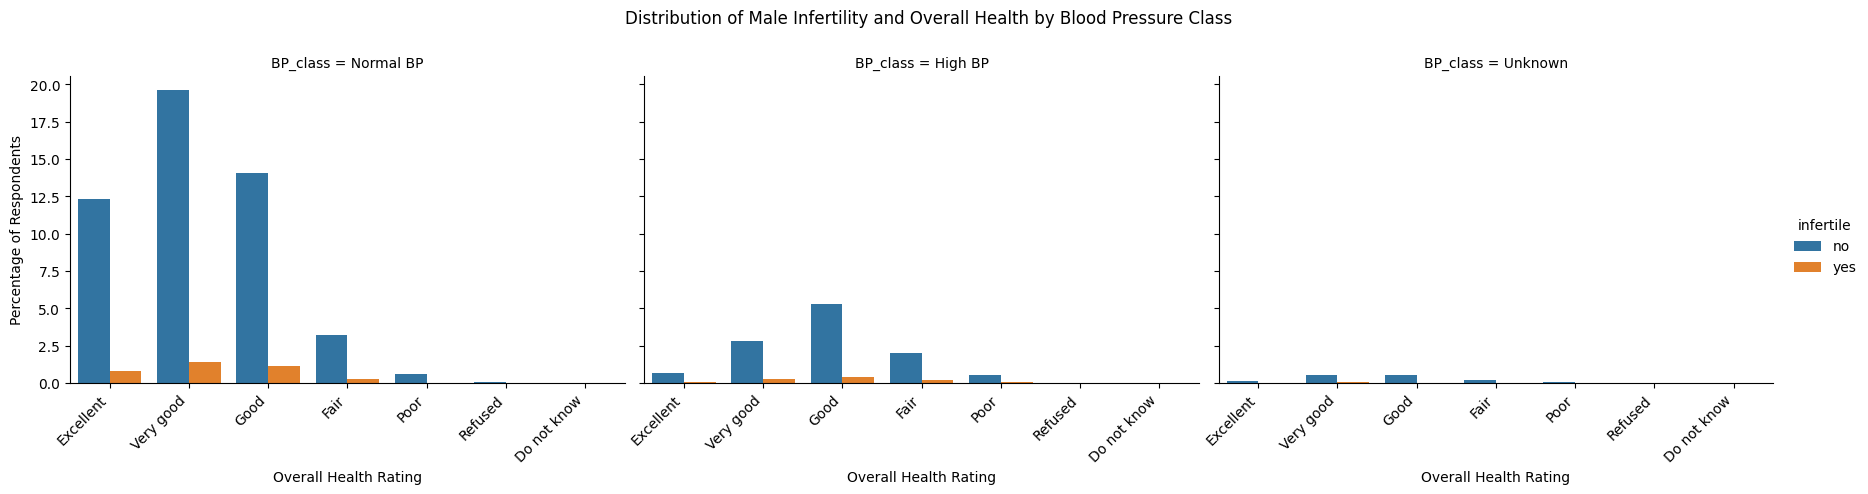

In [30]:
plt.figure(figsize=(3, 4))
ax = sns.catplot(data=df_infhelp, x='GENHEALT', kind='count', stat='percent', hue='infertile', col='BP_class',
                height=4, aspect=1.5)

x_labels = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor', 'Refused', 'Do not know']
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.figure.suptitle('Distribution of Male Infertility and Overall Health by Blood Pressure Class', y=1.08)
ax.set_xlabels('Overall Health Rating')
ax.set_ylabels('Percentage of Respondents')

determine the infertility relevant biological data contained in the fertility X stress survey

In [27]:
#male infertility (fert) and stress
#each column named OS or JS followed by an Arabic number contains responses to survey question related to stress 
df_fert_stress = pd.read_csv('../data/male_fertility_stress_data.csv')
df_fert_stress[['Age', 'Religion', 'Ethnicity', 'Marital_status', 'Marriage_period',
 'children_n', 'Educational_level', 'Employment_status', 'Working_period','Household_income', 'Sperm_quality',
 'OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8', 'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14',
 'OS15', 'OS16', 'OS17', 'OS18', 'OS19', 'OS20', 'OS21', 'OS22', 'OS23', 'OS24', 'OS25', 'OS26', 'OS27',
 'OS28', 'OS29', 'OS30', 'OS31', 'OS32', 'OS33', 'OS34', 'OS35', 'OS36', 'OS37', 'OS38', 'OS39', 'OS40',
 'OS41', 'JS1', 'JS2', 'JS3', 'JS4', 'JS5', 'JS6', 'JS7', 'JS8', 'JS9', 'JS10', 'JS11', 'JS12', 'JS13', 
 'JS14', 'JS15', 'JS16', 'JS17', 'JS18', 'JS19', 'JS20', 'JS21', 'JS22', 'JS23', 'JS24', 'JS25',
 'JS26', 'JS27', 'JS28', 'JS29', 'JS30', 'JS31', 'JS32', 'JS33', 'JS34', 'JS35', 'JS36', 'JP1', 'JP2',
 'JP3', 'JP4', 'JP5', 'JP6']] = df_fert_stress[['Age', 'Religion', 'Ethnicity', 'Marital_status', 'Marriage_period',
 'children_n', 'Educational_level', 'Employment_status', 'Working_period','Household_income', 'Sperm_quality',
 'OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8', 'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14',
 'OS15', 'OS16', 'OS17', 'OS18', 'OS19', 'OS20', 'OS21', 'OS22', 'OS23', 'OS24', 'OS25', 'OS26', 'OS27',
 'OS28', 'OS29', 'OS30', 'OS31', 'OS32', 'OS33', 'OS34', 'OS35', 'OS36', 'OS37', 'OS38', 'OS39', 'OS40',
 'OS41', 'JS1', 'JS2', 'JS3', 'JS4', 'JS5', 'JS6', 'JS7', 'JS8', 'JS9', 'JS10', 'JS11', 'JS12', 'JS13', 
 'JS14', 'JS15', 'JS16', 'JS17', 'JS18', 'JS19', 'JS20', 'JS21', 'JS22', 'JS23', 'JS24', 'JS25',
 'JS26', 'JS27', 'JS28', 'JS29', 'JS30', 'JS31', 'JS32', 'JS33', 'JS34', 'JS35', 'JS36', 'JP1', 'JP2',
 'JP3', 'JP4', 'JP5', 'JP6']].astype('category').reset_index(drop=True)
print(df_fert_stress.shape)
print(df_fert_stress.dtypes)
df_fert_stress.head()


(309, 97)
Unnamed: 0                   int64
ID                           int64
Age                       category
Religion                  category
Ethnicity                 category
                            ...   
JP3                       category
JP4                       category
JP5                       category
JP6                       category
sperm_quality_category      object
Length: 97, dtype: object


,Unnamed: 0,ID,Age,Religion,Ethnicity,Marital_status,Marriage_period,children_n,Educational_level,Employment_status,...,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6,sperm_quality_category
0,0,1,2,1,1,1,1,1,6,1,...,5,5,4,4,4,4,2,5,5,Asthenozoospermia
1,1,2,2,1,1,1,2,1,6,1,...,5,5,5,5,5,4,5,5,5,Normal
2,2,3,2,1,1,1,2,1,6,1,...,5,5,5,5,5,5,5,5,5,Normal
3,3,4,3,1,1,2,1,2,5,1,...,5,5,5,2,2,2,4,5,5,Normal
4,4,5,2,1,1,1,1,1,6,1,...,5,5,5,5,5,5,5,5,5,Normal


plot number of observations in infertility X stress data by sperm quality class

C:\Users\david\AppData\Local\Temp\ipykernel_32612\22945499.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Normal', 'Oligozoospermia', 'Asthenozoospermia', 'Teratozoospermia',


Text(0.5, 0, 'Sperm Quality Class')

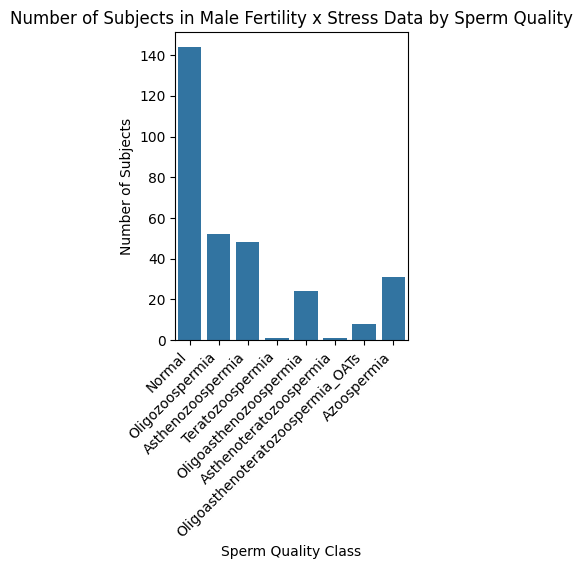

In [28]:
plt.figure(figsize=(3, 4))
ax = sns.countplot(x='Sperm_quality', data=df_fert_stress)
ax.set_xticklabels(['Normal', 'Oligozoospermia', 'Asthenozoospermia', 'Teratozoospermia',
                   'Oligoasthenozoospermia', 'Asthenoteratozoospermia', 'Oligoasthenoteratozoospermia_OATs',
                   'Azoospermia'], rotation=45, ha='right')
plt.title('Number of Subjects in Male Fertility x Stress Data by Sperm Quality')
plt.ylabel('Number of Subjects')
plt.xlabel('Sperm Quality Class')

analyze molecular signature quantitative data
    1.violin/swarm plots to visualize age and BMI distributions in Visem df_mol_sig
    2. Heat map of molecular phenotypes in Visem df_mol_sig

Text(0.5, 1.0, 'BMI Distribution in Visem')

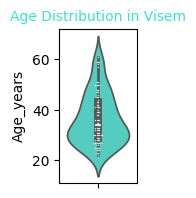

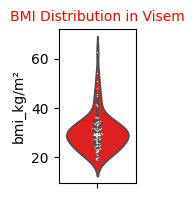

In [47]:
plt.figure(figsize=(1, 2))
sns.violinplot(y='Age_years', data=df_mol_sig, color='turquoise')
sns.swarmplot(y='Age_years', data=df_mol_sig, color='white', alpha=0.8, size=1)
plt.title('Age Distribution in Visem', fontsize=10, color='turquoise')
plt.figure(figsize=(1, 2))
sns.violinplot(y='bmi_kg/m²', data=df_mol_sig, color='red')
sns.swarmplot(y='bmi_kg/m²', data=df_mol_sig, color='white', alpha=0.8, size=1)
plt.title('BMI Distribution in Visem', fontsize=10, color='red')


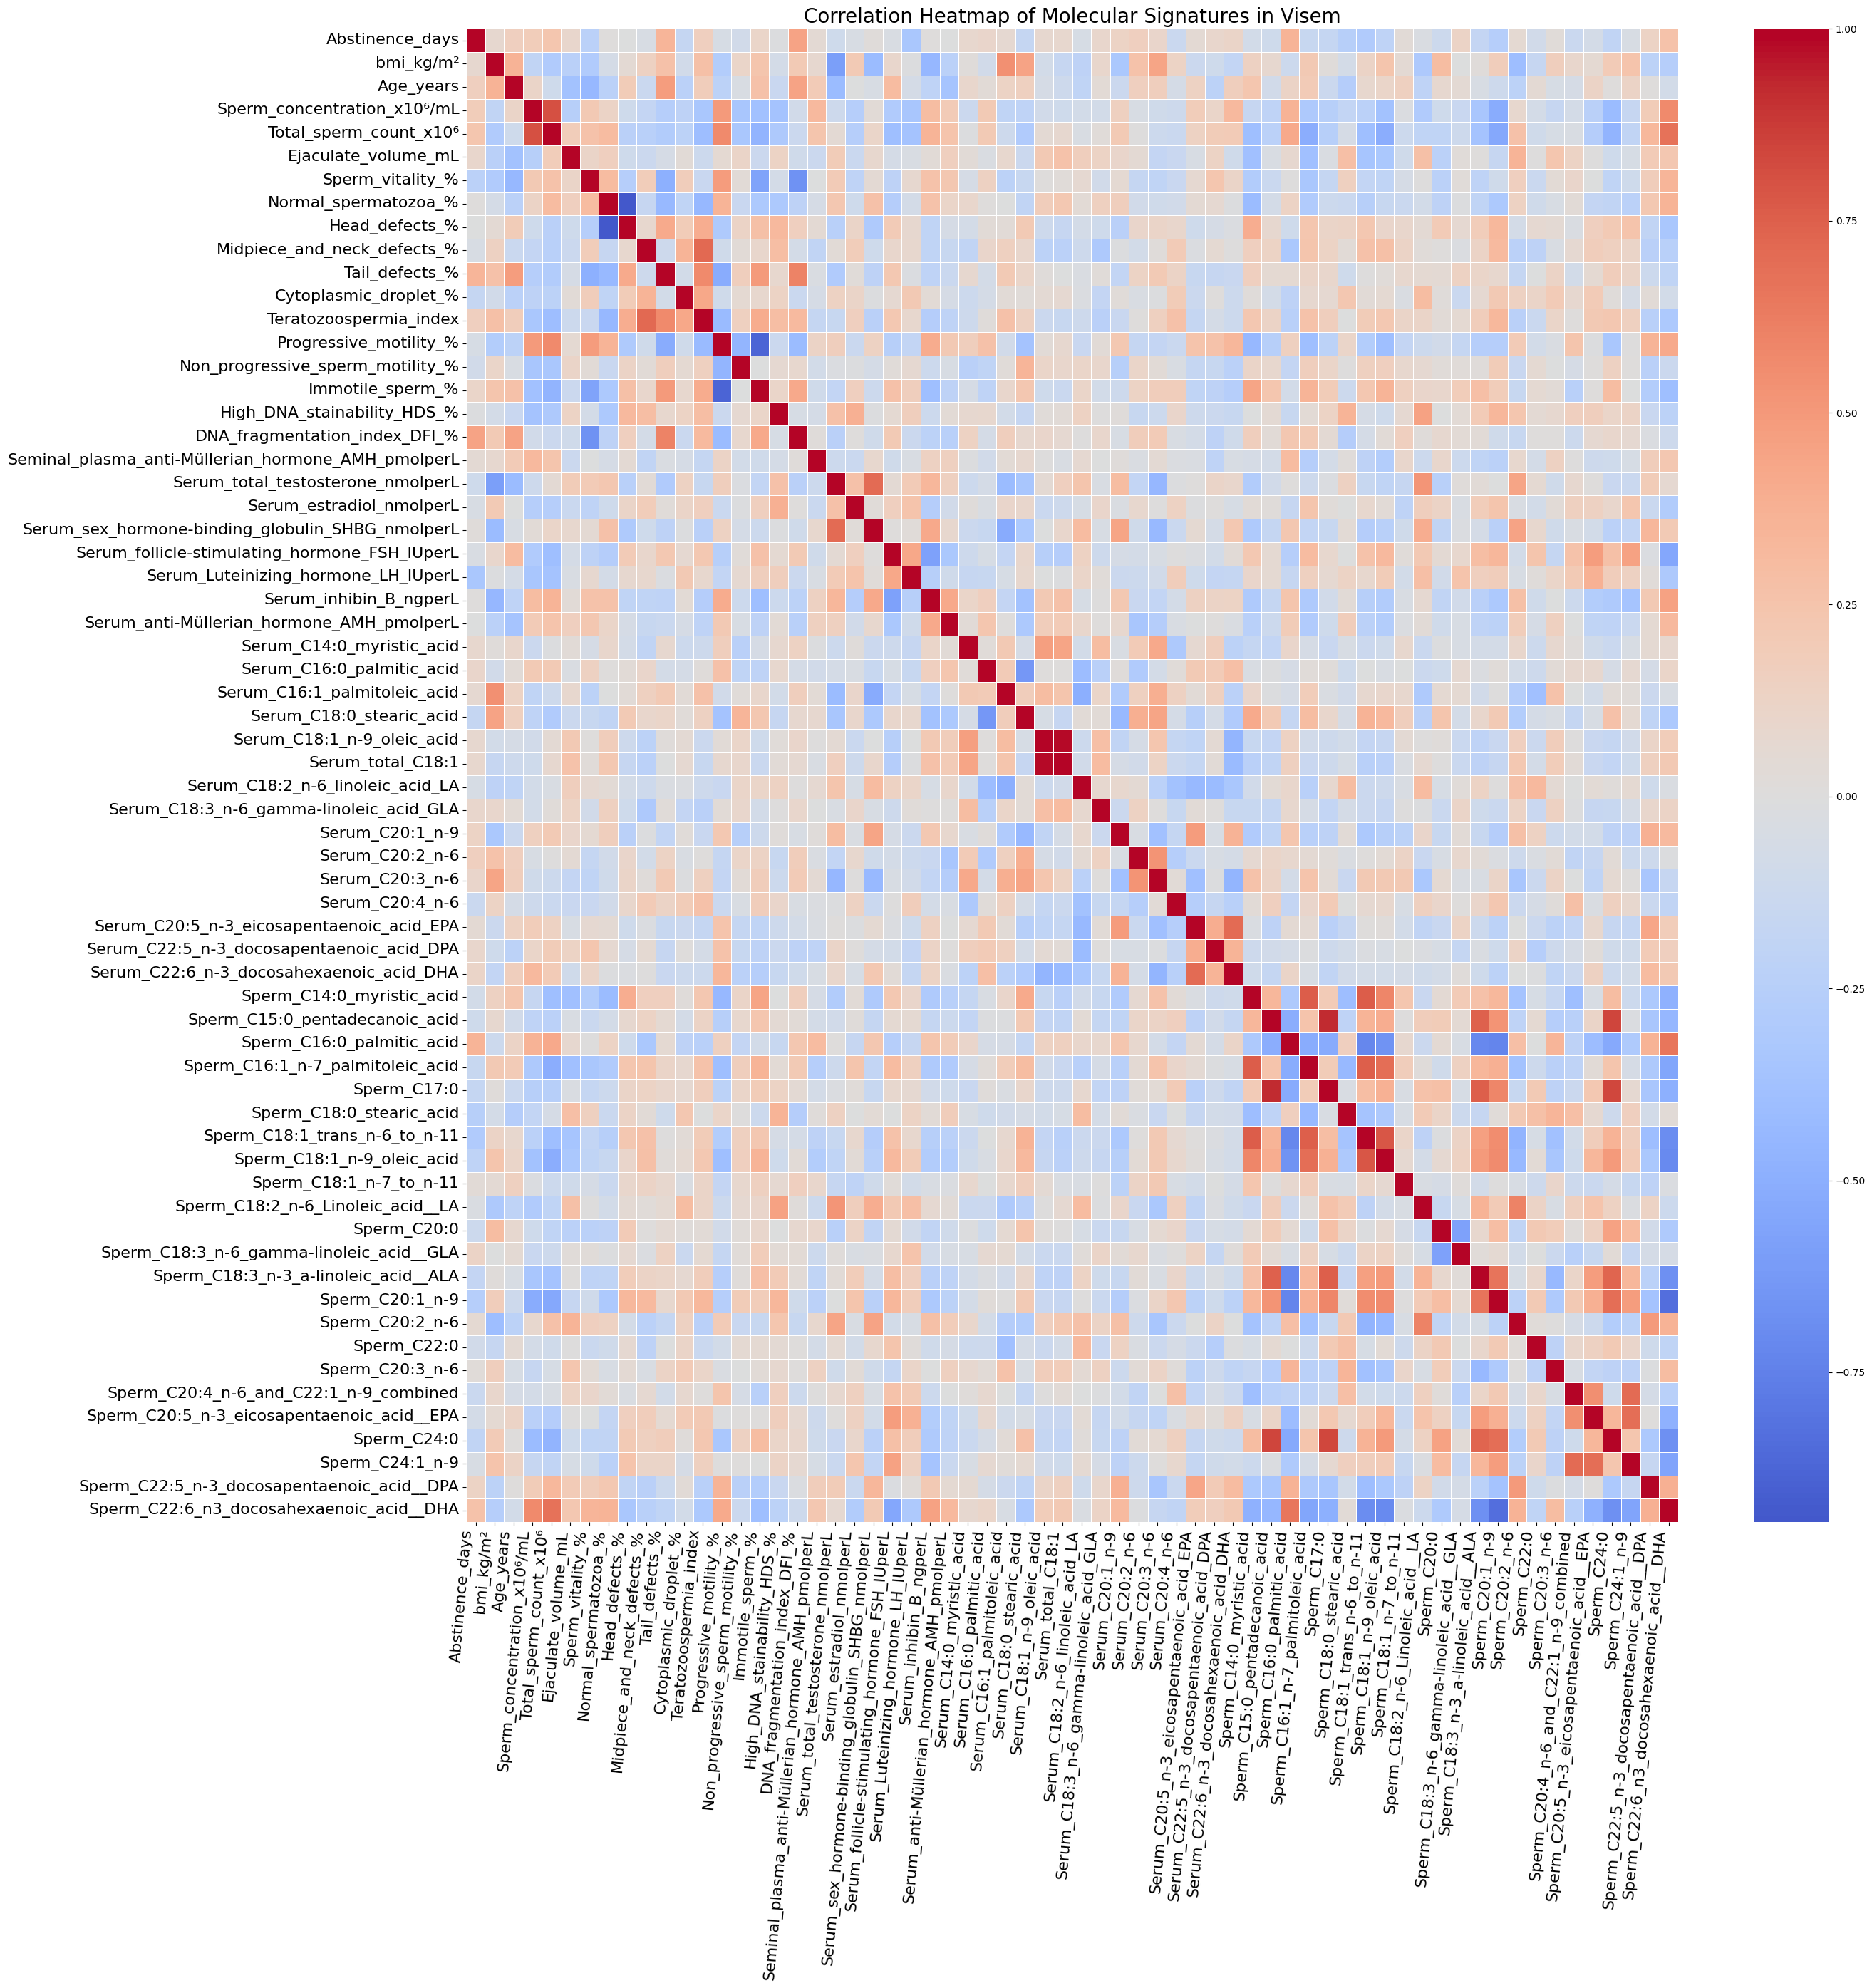

In [73]:
mol_sig_mx = df_mol_sig.corr()
exclude_cols = ['Unnamed: 0', 'ID']
mol_sig_mx_f = mol_sig_mx.drop(columns=exclude_cols, index=exclude_cols)
plt.figure(figsize=(28, 28))
ax = sns.heatmap(mol_sig_mx_f, annot=False, cmap='coolwarm', center=0, linecolor='white', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha='right', fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=16)
plt.title('Correlation Heatmap of Molecular Signatures in Visem', fontsize=20, color='black')
plt.tight_layout()


In [65]:
df_mol_sig.head(3)

,Unnamed: 0,ID,Abstinence_days,bmi_kg/m²,Age_years,Sperm_concentration_x10⁶/mL,Total_sperm_count_x10⁶,Ejaculate_volume_mL,Sperm_vitality_%,Normal_spermatozoa_%,...,Sperm_C20:1_n-9,Sperm_C20:2_n-6,Sperm_C22:0,Sperm_C20:3_n-6,Sperm_C20:4_n-6_and_C22:1_n-9_combined,Sperm_C20:5_n-3_eicosapentaenoic_acid__EPA,Sperm_C24:0,Sperm_C24:1_n-9,Sperm_C22:5_n-3_docosapentaenoic_acid__DPA,Sperm_C22:6_n3_docosahexaenoic_acid__DHA
0,0,1,4.0,32.5,36,105.3,363.1,3.5,81,2.0,...,0.4,0.5,0.1,4.2,2.5,0.06,1.0,1.2,1.3,25.3
1,1,2,4.0,33.7,61,45.4,141.6,3.1,50,3.0,...,0.3,0.9,2.1,2.6,2.6,0.14,1.4,1.6,1.6,17.3
2,2,3,2.0,62.7,51,50.0,124.5,2.5,90,6.9,...,0.4,0.4,1.9,2.2,3.2,0.17,1.7,2.0,1.1,21.5
